# Application of Q-Learning on Copenhagen Metro System
This notebook covers the application of reinforcement learning on an infrastructural exploration of the Copenhagen Metro System. More specifically this projects involves the application of the well-established Q-learning algorithm on a problem of navigating through the network in finding the shortest path possibly from A to B, where A is any station in the network and B is a selected cen-tral point in the network structure.

The SARSA algoritm is implemented toawrds the bottom of the notebook.

This notebook is prepared by:

Octavian Culita, MSc Data Science Student at City, University of London

Henrik Krog Jensen, MSc Data Science Student at City, University of London

In [110]:
# Loading Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output as clear
import warnings

# Additional Settings
np.set_printoptions(threshold=np.nan)
%matplotlib inline
warnings.filterwarnings("ignore")

Below is a representation of the R-matrix of the Copenhagen metro system.

In [111]:
# R-matrix Representation
R = [[0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,0,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,100,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,100,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,0,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan],
    [np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,0,np.nan,np.nan,0],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,100,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,0],
    [np.nan,np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan],
    [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,0,np.nan,np.nan,np.nan,np.nan,0]]

# Defining the R-matrix as a Numpy array
R = np.array(R)

# Goal step count through the system (minima)
goalSteps = np.array([5,7,4,7,3,5,2,5,8,7,4,4,3,1,4,9,1,10,2,5,6,3,5,8,7,3,6,8,6,6,4,6,0,8,6,5,8,9,7])

In searching through the metro system to learn optimum navigation we define the Q-learning algorithm as a function below taking in ten different parameters. Later, some of these parameters are used in the hyperparameter tuning process, others are kept fixed.

In [112]:
# Defining Q-learning algoritm
def qlearning(R,
              goalState,
              alpha=0.5,
              gamma=0.5,
              epsilon=0.9,
              epsilonDecay1=0.9999,
              epsilonDecay2=0.99,
              epsilonThres=0.3,
              convThres=100,
              episodeThres=10000
             ):

    # Lists for storage of results
    steps = []
    rewards = []
    epsilons = []
    
    convCount = 0 # Counting number of consecutive episodes with not changes to the Q-matrix
    episodeCount = 0 # Episode counter
    
    S = np.arange(len(R)) # Possible states
    Q = np.zeros((len(S),len(S))) # Initilization of Q-matrix
    
    # Looping while not cenverged and episode count is under max-assignment
    while ((convCount < convThres) and (episodeCount < episodeThres)):
        
        inState = np.random.choice(S) # Defining random starting point of the episode
        term = True # Restting loop termination value

        step = 0 # Resetting step-counter
        reward = 0 # Resetting reward-counter
        
        Qold = Q.copy() # Defining old Q matrix for convergence comparison
        
        # Looping while state is not terminal state
        while term:
            # Initalizing the state
            if step == 0:
                state = inState

            # Boolean list of available actions given a state
            bool1 = list(map(lambda x: not np.isnan(x), R[state]))

            # Setting action - Epsilon policy (exploring/exploiting)
            if epsilon > np.random.rand():
                action = np.random.choice(S[bool1])
            else:
                maxState = Q[state].max()
                bool2 = list(map(lambda x: x == maxState, Q[state])) # Boolean list of max-valued actions in the state.
                bool3 = list(map(lambda x,y: x and y, bool1, bool2)) # Boolean list of max-valued possible actions in a state.
                action = np.random.choice(S[bool3])
                
            # Updating Q-value on state and action pair
            Q[state][action] = Q[state][action] + alpha*(R[state][action] + gamma*Q[action].max() - Q[state][action])

            # Incrementing steps
            step = step+1
            
            # Adding possible reward
            reward = reward+R[state][action]

            # Setting new state
            state = action

            # Episode break logic
            if state == goalState:
                term = False

        # Decay of epsilon
        if epsilon > epsilonThres:
            epsilon = epsilon*epsilonDecay1
        else:
            epsilon = epsilon*epsilonDecay2
        epsilons.append(epsilon)
            
        # Convergence count incrementing
        if np.array_equal(Q,Qold):
            convCount += 1
        else:
            convCount = 0
            
        # Appending episode info
        steps.append(step)
        rewards.append(reward)
        
        # Episode count incrementing
        episodeCount += 1
    
    # Normalized Q-matrix
    Qnorm = Q / Q.max()
    
    # Assigning number of epsiodes in the run
    numEpisodes = len(steps)
    
    return (Qnorm,Q,steps,rewards,epsilons,numEpisodes)

The optimum values of alpha, gamma and epsilonThres are to be found in a grid search. These parameters are chosen in order to allow the model to tune on the learning rate, discount factor and the transition between exploration and exploitation, while the grid search are kept a minimum of parameters.

In [5]:
# Grid Search on Alpha, Gamma and Epsilon Threshold
''' TAKES APPROXIMATELY 60 MINUTES '''

# Parameters for the grid search
als = np.array([0.1,0.3,0.5,0.7,0.9]) # Alpha values
gas = np.array([0.1,0.3,0.5,0.7,0.9]) # Gamma values
eps = np.array([0.4,0.8]) # Epsilon Threshold values

# Repitions setup for calculation of min, max, mean and std
reps = np.arange(0,10)

# Initializing the result matrix
results = np.zeros((len(reps),len(eps),len(als),len(gas)))

# Goal state/Terminal state
goal = 32

# Status message setup
status = 0
total = len(reps)*len(eps)*len(als)*len(gas)

# Grid Search Loop
for rep in reps:    
    for epId, ep in enumerate(eps):
        for alId, al in enumerate(als):
            for gaId, ga in enumerate(gas):
                #Status message
                status = status + 1 # Increment status
                print('Status:',status,'out of',total) # Status message printout
                
                # Q-learning run
                Qnorm,Q,steps,rewards,epsilons,numEpisodes = qlearning(R=R,
                                                                       goalState=goal,
                                                                       alpha=al,
                                                                       gamma=ga,
                                                                       epsilonThres=ep)

                # Assigning results (number of episodes for each setting) to the result matrix
                results[rep][epId][alId][gaId] = numEpisodes
                
                clear() # Clearing status message

After running the grid-search we will be viewing the results.

In [108]:
# Min of results
resultsMin = np.min(results, axis=0)
# Max of results
resultsMax = np.max(results, axis=0)
# Mean of results
resultsMean = np.mean(results, axis=0)
# Std of results
resultsStd = np.std(results, axis=0)

# Printing results (not corrected)
print('Min restults:\n',np.round(resultsMin))
print('Max restults:\n',np.round(resultsMax))
print('Mean restults:\n',np.round(resultsMean))
print('Std restults:\n',np.round(resultsStd))

Min restults:
 [[[10000. 10000. 10000. 10000. 10000.]
  [ 7339.  8734. 10000. 10000. 10000.]
  [ 3927.  5352.  7935. 10000. 10000.]
  [  417.   290.   487.  8661.   837.]
  [  336.   173.   173.   379.   256.]]

 [[10000. 10000. 10000. 10000. 10000.]
  [ 5064.  6295.  8724. 10000. 10000.]
  [ 2823.   441.  5532.  8002. 10000.]
  [ 1261.  2579.  3142.   552. 10000.]
  [  443.   193.   326.   256.   307.]]]
Max restults:
 [[[10000. 10000. 10000. 10000. 10000.]
  [ 8494. 10000. 10000. 10000. 10000.]
  [ 5998.  8017.  9443. 10000. 10000.]
  [ 3789.  6081.  7101. 10000. 10000.]
  [ 2431.  3684.  5493.  8126. 10000.]]

 [[10000. 10000. 10000. 10000. 10000.]
  [ 5832.  7739. 10000. 10000. 10000.]
  [ 3714.  4987.  6415. 10000. 10000.]
  [ 2790.  3619.  4820.  7555. 10000.]
  [ 2020.  2533.  3688.  5816. 10000.]]]
Mean restults:
 [[[10000. 10000. 10000. 10000. 10000.]
  [ 8126.  9594. 10000. 10000. 10000.]
  [ 4564.  6672.  8449. 10000. 10000.]
  [ 2665.  3990.  5565.  9336.  9084.]
  [ 1054. 

To study and explore the results better we are plotting a surface plot for each epsilonThres-value.

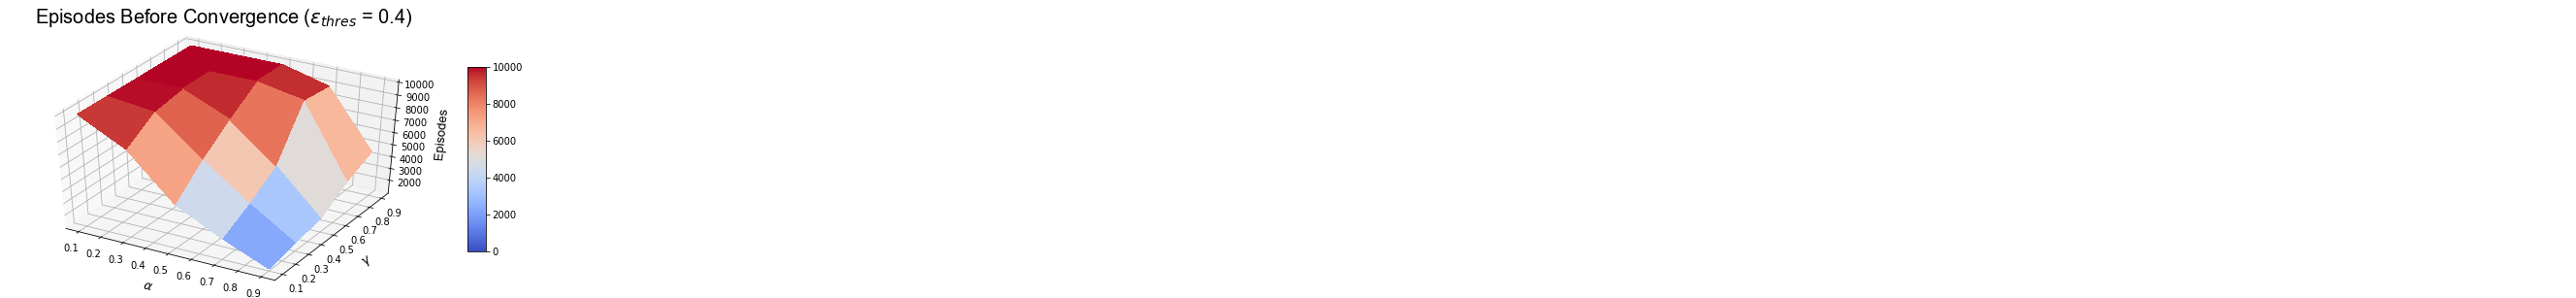

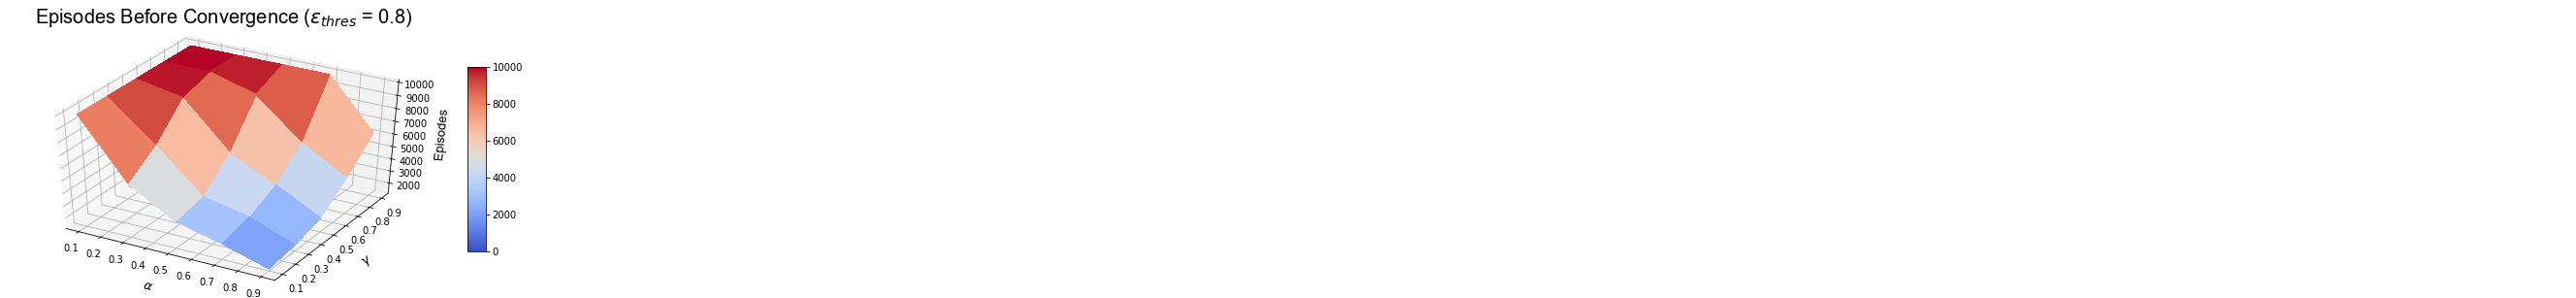

In [98]:
# Surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Plot loop to generate multiple plots iterating over epsilonThres
for i in range(len(eps)):
    fig = plt.figure(figsize=(10,5)) # Figure
    ax = fig.gca(projection='3d') # Axis
    ax.view_init(40, 300) # Angle

    # Making the data for plotting
    X = als
    Y = gas
    X, Y = np.meshgrid(X, Y)
    Z = np.transpose(resultsMean[i])

    # Plotting the surface
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=0, vmax=10000)

    # Add a color bar which maps values to colors
    plt.colorbar(surf, shrink=0.7, aspect=10)
    plt.xlabel(r'$\alpha$', labelpad=10, fontdict={'family':'arial','size':13})
    plt.ylabel(r'$\gamma$', labelpad=10, fontdict={'family':'arial','size':13})
    ax.set_zlabel('Episodes', labelpad=7, fontdict={'family':'arial','size':13})
    plt.title(r'Episodes Before Convergence ($\epsilon_{thres}$ = %s)' % eps[i], fontdict={'family':'arial','size':20}, y=1.08)
    plt.show()

After plotting the results data, we will find the optimal paramters for fastest convergence.

In [99]:
# Index of optimal paramters
indicies = np.unravel_index(resultsMean.argmin(),resultsMean.shape)

#Optimal parameters
epsilonOpt = eps[indicies[0]]
alphaOpt = als[indicies[1]]
gammaOpt = gas[indicies[2]]

print('Optimum values')
print('Alpha:',alphaOpt,'\nGamma:',gammaOpt,'\nEpsilon:',epsilonOpt)

Optimum values
Alpha: 0.9 
Gamma: 0.1 
Epsilon: 0.4


To explore the optimal run in detail we will be doing an example run below and do a combined performance plot with number of steps and cumulative reward/steps on episodes.

In [100]:
# Running Q-learning algorithm with optimal parameters
np.random.seed(1) # Fixing seed
Qnorm,Q,steps,rewards,epsilons,numEpisodes = qlearning(R=R,goalState=goal,
                                                       alpha=alphaOpt,
                                                       gamma=gammaOpt,
                                                       epsilonThres=epsilonOpt)

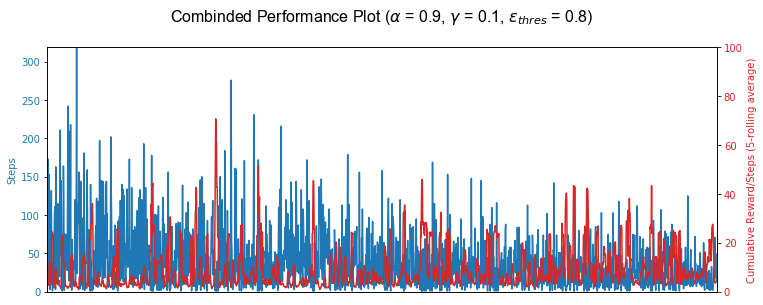

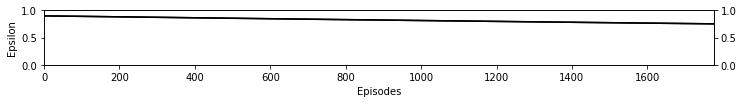

In [101]:
# Plotting run
cumu = np.array(rewards)/np.array(steps) # Calculating the cumulative reward/steps
cumuSeries = pd.Series(cumu) # Converting to a data-series
cumuMoving = cumuSeries.rolling(5, center=True).mean() # Cumulative reward/steps (10-rolling average)

fig, ax1 = plt.subplots()
color = 'tab:blue'
# First axis
ax1.set_ylabel('Steps', color=color)
ax1.plot(steps, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.get_xaxis().set_visible(False)
ax1.set_xlim(0,numEpisodes)
ax1.set_ylim(0,np.max(steps))
# Second axis
color = 'tab:red'
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Cumulative Reward/Steps (5-rolling average)', color=color)  # we already handled the x-label with ax1
ax2.plot(cumuMoving, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)
# Figure settings
fig.set_figwidth(12)
fig.set_figheight(4.5)
plt.title(r'Combinded Performance Plot ($\alpha$ = 0.9, $\gamma$ = 0.1, $\epsilon_{thres}$ = 0.8)', fontdict={'family':'arial','size':16}, y=1.08)
plt.show()

# Plotting the Epsilon-value on the number of epsiodes taken
fig, ax1 = plt.subplots()
color = 'black'
# First axis
ax1.set_ylabel('Epsilon', color=color)
ax1.set_xlabel('Episodes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0,numEpisodes)
ax1.set_ylim(0,1)
# Second axis
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
#ax2.set_ylabel(' ', color=color)  # we already handled the x-label with ax1
ax2.plot(epsilons, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1)
ax2.plot(epsilons, color='black')
# Figure settings
fig.set_figwidth(12)
fig.set_figheight(1)
plt.show(1.5)

In [102]:
# Number of episodes before convergence (not corrected threshold)
print('Number of episodes:',numEpisodes)

Number of episodes: 1776


In [103]:
# Checking solution
S = np.arange(len(R)) # States
check = np.zeros(len(R)) # Storage 

for i in S:
    stateIn = i
    state = i
    counter = 0
    while (state != goal) and (counter<20):
        action = np.unravel_index(Q[state].argmax(),Q[state].shape)[0]
        counter = counter + 1
        state = action
    
    check[stateIn] = counter
    
print('Correct solution:',all(check == goalSteps))

Correct solution: True


Below is a residuals plot between results for epsilonThres = 0.4 and epsilonThres = 0.8. Runs that did not converge before reaching 10000 episodes are excluded from the plot.

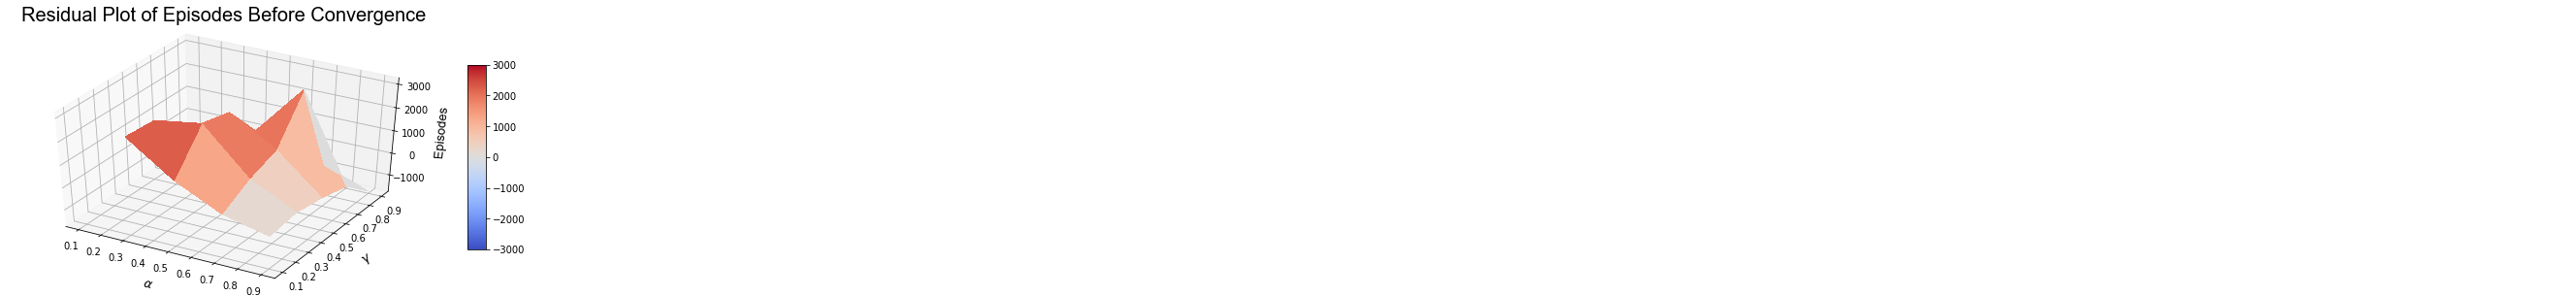

In [115]:
# Residuals between means of different epsilon thresholds
residual = resultsMean[0]-resultsMean[1]

# Masking residuals
tf = np.logical_and((resultsMean == 10000)[0],(resultsMean == 10000)[1])
residual[tf] = np.nan

# Creating plot
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.view_init(40, 300)

# Making the data for plotting
X = als
Y = gas
X, Y = np.meshgrid(X, Y)
Z = np.transpose(residual)

# Setting color map
cmap = plt.get_cmap('coolwarm')
cmap.set_over(color='black', alpha = 0)
cmap.set_under(color='black', alpha = 0)
cmap.set_bad(color='black', alpha = 0)

# Plotting the surface
surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False, vmin=-3000, vmax=3000)

# Add a color bar which maps values to colors
plt.colorbar(surf, shrink=0.7, aspect=10)
plt.xlabel(r'$\alpha$', labelpad=10, fontdict={'family':'arial','size':13})
plt.ylabel(r'$\gamma$', labelpad=10, fontdict={'family':'arial','size':13})
ax.set_zlabel('Episodes', labelpad=7, fontdict={'family':'arial','size':13})

plt.title(r'Residual Plot of Episodes Before Convergence', fontdict={'family':'arial','size':20}, y=1.08)
plt.show()

# SARSA Algorithm
Applying SARSA on-policy algorithm to the problem.

In [116]:
# Defining SARSA algoritm
def sarsa(R,
          goalState,
          alpha=0.5,
          gamma=0.5,
          epsilon=0.9,
          epsilonDecay1=0.9999,
          epsilonDecay2=0.99,
          epsilonThres=0.3,
          convThres=50,
          episodeThres=10000):

    # Lists for storage of results
    steps = []
    rewards = []
    epsilons = []
    
    convCount = 0 # Counting number of consecutive episodes with not changes to the Q-matrix
    episodeCount = 0 # Episode counter
    
    S = np.arange(len(R)) # Possible states
    Q = np.zeros((len(S),len(S))) # Initilization of Q-matrix
    
    # Looping while not cenverged and episode count is under max-assignment
    while ((convCount < convThres) and (episodeCount < episodeThres)):
        
        inState = np.random.choice(S) # Defining random starting point of the episode
        term = True # Restting loop termination value

        step = 0 # Resetting step-counter
        reward = 0 # Resetting reward-counter
        
        Qold = Q.copy() # Defining old Q matrix for convergence comparison
        
        # Looping while state is not terminal state
        while term:
            # Initalizing the state
            if step == 0:
                state = inState

            # Boolean list of available actions given a state
            bool1 = list(map(lambda x: not np.isnan(x), R[state]))

            # Setting action - Epsilon policy (exploring/exploiting)
            if epsilon > np.random.rand():
                action = np.random.choice(S[bool1])
            else:
                maxState = Q[state].max()
                bool2 = list(map(lambda x: x == maxState, Q[state])) # Boolean list of max-valued actions in the state.
                bool3 = list(map(lambda x,y: x and y, bool1, bool2)) # Boolean list of max-valued possible actions in a state.
                action = np.random.choice(S[bool3])
            
            # Boolean list of available actions given a state+1
            state1 = action
            bool4 = list(map(lambda x: not np.isnan(x), R[state1]))

            # Setting action+1 - Epsilon policy (exploring/exploiting)
            if epsilon > np.random.rand():
                action1 = np.random.choice(S[bool4])
            else:
                maxState = Q[state1].max()
                bool5 = list(map(lambda x: x == maxState, Q[state1])) # Boolean list of max-valued actions in the state+1.
                bool6 = list(map(lambda x,y: x and y, bool4, bool5)) # Boolean list of max-valued possible actions in a state+1.
                action1 = np.random.choice(S[bool6])
                
            # Updating Q-value on state and action pair
            if state1 == goalState:
                q1 = 0
            else:
                q1 = Q[state1][action1]
            
            Q[state][action] = Q[state][action] + alpha*(R[state][action] + gamma*q1 - Q[state][action])

            # Incrementing steps
            step = step+1
            
            # Adding possible reward
            reward = reward+R[state][action]

            # Setting new state
            state = action

            # Episode break logic
            if state == goalState:
                term = False

        # Decay of epsilon
        if epsilon > epsilonThres:
            epsilon = epsilon*epsilonDecay1
        else:
            epsilon = epsilon*epsilonDecay2
        epsilons.append(epsilon)
            
        # Convergence count incrementing
        if np.array_equal(Q,Qold):
            convCount += 1
        else:
            convCount = 0
            
        # Appending episode info
        steps.append(step)
        rewards.append(reward)
        
        # Episode count incrementing
        episodeCount += 1
    
    # Normalized Q-matrix
    Qnorm = Q / Q.max()
    
    # Assigning number of epsiodes in the run
    numEpisodes = len(steps)
    
    return (Qnorm,Q,steps,rewards,epsilons,numEpisodes)

To explore the SARSA algorithm in detail we will be doing an example run below and do a combined performance plot with number of steps and cumulative reward/steps on episodes.

In [119]:
# Running SARSA algorithm with optimal parameters
np.random.seed(1) # Fixing seed
Qnorm,Q,steps,rewards,epsilons,numEpisodes = sarsa(R=R,goalState=goal,
                                                   alpha=alphaOpt,
                                                   gamma=gammaOpt,
                                                   epsilonThres=epsilonOpt)

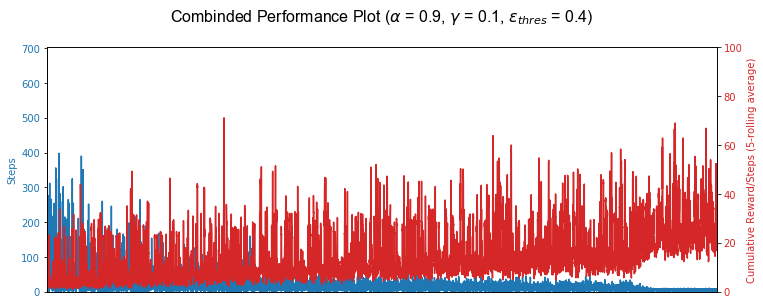

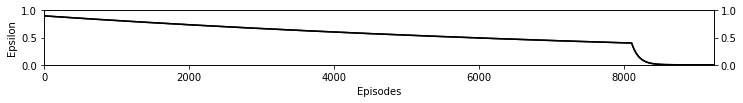

In [120]:
# Plotting run
cumu = np.array(rewards)/np.array(steps) # Calculating the cumulative reward/steps
cumuSeries = pd.Series(cumu) # Converting to a data-series
cumuMoving = cumuSeries.rolling(5, center=True).mean() # Cumulative reward/steps (10-rolling average)

fig, ax1 = plt.subplots()
color = 'tab:blue'
# First axis
ax1.set_ylabel('Steps', color=color)
ax1.plot(steps, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.get_xaxis().set_visible(False)
ax1.set_xlim(0,numEpisodes)
ax1.set_ylim(0,np.max(steps))
# Second axis
color = 'tab:red'
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Cumulative Reward/Steps (5-rolling average)', color=color)  # we already handled the x-label with ax1
ax2.plot(cumuMoving, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)
# Figure settings
fig.set_figwidth(12)
fig.set_figheight(4.5)
plt.title(r'Combinded Performance Plot ($\alpha$ = 0.9, $\gamma$ = 0.1, $\epsilon_{thres}$ = 0.4)', fontdict={'family':'arial','size':16}, y=1.08)
plt.show()

# Plotting the Epsilon-value on the number of epsiodes taken
fig, ax1 = plt.subplots()
color = 'black'
# First axis
ax1.set_ylabel('Epsilon', color=color)
ax1.set_xlabel('Episodes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0,numEpisodes)
ax1.set_ylim(0,1)
# Second axis
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
#ax2.set_ylabel(' ', color=color)  # we already handled the x-label with ax1
ax2.plot(epsilons, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1)
ax2.plot(epsilons, color='black')
# Figure settings
fig.set_figwidth(12)
fig.set_figheight(1)
plt.show(1.5)

In checking for stability we run the calculation multiple times for each epsilon threshold.

In [122]:
# Running experirents multiple times to check stability
checks = range(10)
resultsSarsa = np.zeros((len(checks),len(eps)))

for i in checks:
    print('Status:', i+1, 'of', len(checks)) # Status
    for epId, ep in enumerate(eps):      
        # Learning run
        Qnorm,Q,steps,rewards,epsilons,numEpisodes = sarsa(R=R,goalState=goal,
                                                           alpha=alphaOpt,
                                                           gamma=gammaOpt,
                                                           epsilonThres=ep)
        resultsSarsa[i][epId] = numEpisodes
    clear()
        
# Min of results
resultsSarsaMin = np.min(resultsSarsa, axis=0)
# Max of results
resultsSarsaMax = np.max(resultsSarsa, axis=0)
# Mean of results
resultsSarsaMean = np.mean(resultsSarsa, axis=0)
# Std of results
resultsSarsaStd = np.std(resultsSarsa, axis=0)

#Printing results (not corrected)
print(r'Min number of episodes, epsilon_thres = 0.4:',np.round(resultsSarsaMin[0]))
print(r'Min number of episodes, epsilon_thres = 0.8:',np.round(resultsSarsaMin[1]))
print(r'Max number of episodes, epsilon_thres = 0.4:',np.round(resultsSarsaMax[0]))
print(r'Max number of episodes, epsilon_thres = 0.8:',np.round(resultsSarsaMax[1]))
print(r'Mean number of episodes, epsilon_thres = 0.4:',np.round(resultsSarsaMean[0]))
print(r'Mean number of episodes, epsilon_thres = 0.8:',np.round(resultsSarsaMean[1]))
print(r'Std of episodes, epsilon_thres = 0.4:',np.round(resultsSarsaStd[0]))
print(r'Std of episodes, epsilon_thres = 0.8:',np.round(resultsSarsaStd[1]))

Min number of episodes, epsilon_thres = 0.4: 9157.0
Min number of episodes, epsilon_thres = 0.8: 2316.0
Max number of episodes, epsilon_thres = 0.4: 9659.0
Max number of episodes, epsilon_thres = 0.8: 2578.0
Mean number of episodes, epsilon_thres = 0.4: 9346.0
Mean number of episodes, epsilon_thres = 0.8: 2451.0
Std of episodes, epsilon_thres = 0.4: 154.0
Std of episodes, epsilon_thres = 0.8: 103.0
